In [1]:
from paddleocr import PaddleOCR,draw_ocr
import albumentations as A
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from PIL import Image
import IPython

In [24]:
max_text_length= 2
drop_score = 0.9
med = 'zeromin'
img_path = './test_data/'+med+'.png'
save_path = './Data/preprocessed_img/'

In [25]:
# Declare an augmentation pipeline
transform = A.Compose([
    #A.Resize(height = 512, width = 512),
    A.RandomResizedCrop(p=1, height= 820 ,width= 820, scale=(0.65, 0.95),ratio=(0.90, 1.10)),
    A.RandomBrightnessContrast(always_apply=True, p=1.0, brightness_limit=(-0.4, 0.4), contrast_limit=(-0.4, 0.4), brightness_by_max=False),
    A.SafeRotate(always_apply=True, p=0.5, limit=(-10, 40), interpolation=2, border_mode=0, value=(0, 0, 0), mask_value=None),
    #A.HorizontalFlip(always_apply=False, p=0.5),
    A.CenterCrop(always_apply=True, p=1, height=512, width=512)
    #    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0, p=1.0)
    #A.pytorch.transforms.ToTensorV2()
])
transform_o = A.Compose([
    A.Resize(height = 400, width = 256)
])

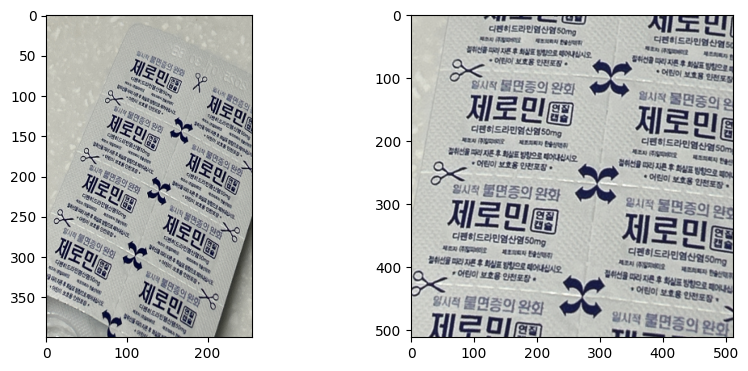

In [26]:

plt.figure(figsize=(10,200))
im_bgr = cv2.imread(img_path)
img = im_bgr[:, :, ::-1]

transformed_img = transform(image=img)["image"]

plt.subplot(40,2,1)
plt.imshow(transform_o(image=img)['image'], cmap=plt.cm.binary)
plt.grid(False)
plt.subplot(40,2,2)

plt.imshow(transformed_img, cmap=plt.cm.binary)
plt.show()

In [30]:
img_array = Image.fromarray(transformed_img.astype(np.uint8))
file_name = f"{med}_preprocessed.jpg"
img_array.save(os.path.join(save_path,file_name))

In [27]:
ocr = PaddleOCR(lang='korean', max_text_length=max_text_length, drop_score=drop_score) # need to run only once to download and load model into memory

[2023/11/11 15:24:32] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/hojun/.paddleocr/whl/det/ml/Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/hojun/.paddleocr/whl/rec/korean/korean_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_le

In [31]:
def plt_imshow(title='image', img=None, figsize=(8, 5)):
    plt.figure(figsize=figsize)

    if type(img) is str:
        img = cv2.imread(img)

    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []

            for i in range(len(img)):
                titles.append(title)

        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)

            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])

        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

def show_img_with_ocr(img_path, result):
        img = cv2.imread(img_path)
        roi_img = img.copy()

        for text_result in result:
            text = text_result[1][0]
            tlX = int(text_result[0][0][0])
            tlY = int(text_result[0][0][1])
            trX = int(text_result[0][1][0])
            trY = int(text_result[0][1][1])
            brX = int(text_result[0][2][0])
            brY = int(text_result[0][2][1])
            blX = int(text_result[0][3][0])
            blY = int(text_result[0][3][1])

            pts = ((tlX, tlY), (trX, trY), (brX, brY), (blX, blY))

            topLeft = pts[0]
            topRight = pts[1]
            bottomRight = pts[2]
            bottomLeft = pts[3]

            cv2.line(roi_img, topLeft, topRight, (0, 255, 0), 2)
            cv2.line(roi_img, topRight, bottomRight, (0, 255, 0), 2)
            cv2.line(roi_img, bottomRight, bottomLeft, (0, 255, 0), 2)
            cv2.line(roi_img, bottomLeft, topLeft, (0, 255, 0), 2)
            #roi_img = put_text(roi_img, text, topLeft[0], topLeft[1] - 20, font_size=15)

            #print(text)

        plt_imshow(["Original", "ROI"], [img, roi_img], figsize=(16, 10))

In [28]:
def run_ocr(self, img_path: str, debug: bool = False):
        self.img_path = img_path
        ocr_text = []
        result = self._ocr.ocr(img_path, cls=False)
        self.ocr_result = result[0]

        if self.ocr_result:
            for r in result[0]:
                ocr_text.append(r[1][0])
        else:
            ocr_text = "No text detected."

        if debug:
            self.show_img_with_ocr()

        return ocr_text

In [ ]:
dir_path = "./test_data/tylenol/"

disaster_dataset = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        if img.endswith('.jpg'):
            disaster_dataset.append(folder+img)
print(len(disaster_dataset))

[2023/11/11 15:27:32] ppocr DEBUG: dt_boxes num : 108, elapsed : 0.1507551670074463


[2023/11/11 15:27:33] ppocr DEBUG: rec_res num  : 108, elapsed : 0.3896517753601074
[[[468.0, 35.0], [511.0, 41.0], [511.0, 59.0], [466.0, 53.0]], ('산염5', 0.9333671927452087)]
[[[221.0, 105.0], [260.0, 107.0], [259.0, 130.0], [220.0, 128.0]], ('완회', 0.9996209144592285)]
[[[91.0, 129.0], [173.0, 129.0], [173.0, 170.0], [91.0, 170.0]], ('제로', 0.9800617098808289)]
[[[408.0, 121.0], [503.0, 131.0], [500.0, 155.0], [405.0, 145.0]], ('불면증의', 0.9256799817085266)]
[[[169.0, 134.0], [212.0, 134.0], [212.0, 169.0], [169.0, 169.0]], ('민', 0.9595852494239807)]
[[[357.0, 144.0], [495.0, 156.0], [491.0, 199.0], [353.0, 187.0]], ('제로민', 0.9986100196838379)]
[[[351.0, 212.0], [375.0, 214.0], [374.0, 225.0], [350.0, 223.0]], ('로차', 0.9052179455757141)]
[[[98.0, 229.0], [139.0, 231.0], [138.0, 246.0], [97.0, 244.0]], ('어린이', 0.9235208034515381)]
[[[376.0, 248.0], [413.0, 254.0], [410.0, 269.0], [374.0, 263.0]], ('어린이', 0.9161651134490967)]
[[[413.0, 253.0], [448.0, 259.0], [446.0, 273.0], [411.0, 267.0]

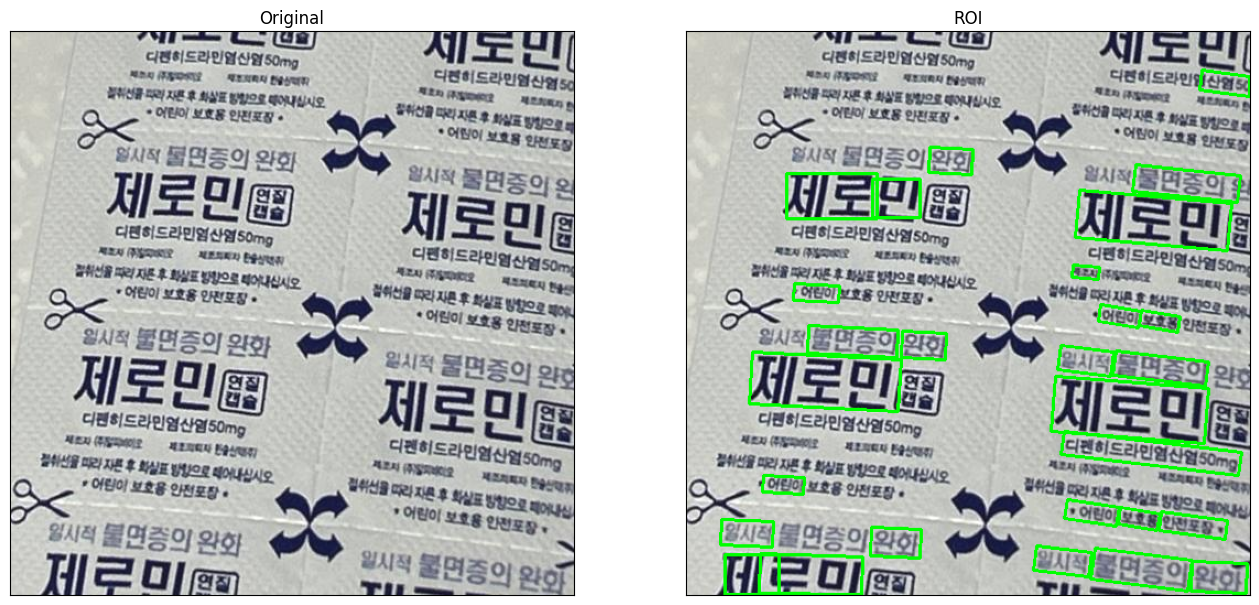

In [35]:
img_path = os.path.join(save_path,file_name)
result = ocr.ocr(img_path, cls=False)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line)

show_img_with_ocr(img_path, result[0])

In [50]:
texts = []
for i in range(len(result[0])):
    text = result[0][i][1][0]

    texts.append(text)
print(texts)


['산염5', '완회', '제로', '불면증의', '민', '제로민', '로차', '어린이', '어린이', '보호온', '불면증의', '완화', '제로민', '일치적', '불면증의', '제로민', '디렌히드라민염산염50m', '어린이', '어린이', '보호옹', '임시적', '안전포', '완화', '제', '로미', '입시적', '불면증의', '완화']


In [ ]:
import re

words = ['산염5', '완회', '제로', '불면증의', '민', '제로민', '로차', '어린이', '어린이', '보호온', '불면증의', '완화', '제로민', '일치적', '불면증의', '제로민', '디렌히드라민염산염50m', '어린이', '어린이', '보호옹', '임시적', '안전포', '완화', '제', '로미', '입시적', '불면증의', '완화']

# 한글 문자만 포함된 단어 필터링
filtered_words = [word for word in words if re.fullmatch(r'[가-힣]+', word)]

print(set(filtered_words))

In [64]:
# 리스트를 하나의 문자열로 변환
filtered_words = set(filtered_words)
combined_string = ' '.join(filtered_words)

print(combined_string)

일치적 보호옹 입시적 어린이 제로민 임시적 보호온 불면증의 안전포


In [58]:
dir_path = "./Data/augmented_data/"

dataset = []
for folder, subfolders, filenames in os.walk(dir_path):
    for img in filenames:
        if img.endswith('.jpg'):
            dataset.append(folder+'/'+img)
print(len(dataset))

3000


In [59]:
dataset

['./Data/augmented_data/lepical_augmented/lepical_935.jpg',
 './Data/augmented_data/lepical_augmented/lepical_875.jpg',
 './Data/augmented_data/lepical_augmented/lepical_986.jpg',
 './Data/augmented_data/lepical_augmented/lepical_53.jpg',
 './Data/augmented_data/lepical_augmented/lepical_939.jpg',
 './Data/augmented_data/lepical_augmented/lepical_732.jpg',
 './Data/augmented_data/lepical_augmented/lepical_269.jpg',
 './Data/augmented_data/lepical_augmented/lepical_737.jpg',
 './Data/augmented_data/lepical_augmented/lepical_45.jpg',
 './Data/augmented_data/lepical_augmented/lepical_824.jpg',
 './Data/augmented_data/lepical_augmented/lepical_435.jpg',
 './Data/augmented_data/lepical_augmented/lepical_916.jpg',
 './Data/augmented_data/lepical_augmented/lepical_919.jpg',
 './Data/augmented_data/lepical_augmented/lepical_504.jpg',
 './Data/augmented_data/lepical_augmented/lepical_398.jpg',
 './Data/augmented_data/lepical_augmented/lepical_242.jpg',
 './Data/augmented_data/lepical_augmented/

In [62]:
augmented_test = pd.DataFrame(dataset, columns=['image_id'])
augmented_test['image_id'] = augmented_test['image_id'].apply(lambda x: os.path.basename(x))
augmented_test

,image_id
0,lepical_935.jpg
1,lepical_875.jpg
2,lepical_986.jpg
3,lepical_53.jpg
4,lepical_939.jpg
...,...
2995,tylenol_693.jpg
2996,tylenol_868.jpg
2997,tylenol_401.jpg
2998,tylenol_39.jpg


In [67]:
print(dataset[999])

./Data/augmented_data/lepical_augmented/lepical_240.jpg


In [68]:
all_texts = []
all_labels = []

label = -1
for j, d in enumerate(dataset):
    result = ocr.ocr(d, cls=False)
    texts = []
    for i in range(len(result[0])):
        
        text = result[0][i][1][0]
        texts.append(text)
        
    if j % 1000 == 0:
        label +=1
                        
    filtered_words = [word for word in texts if re.fullmatch(r'[가-힣]{3,4}', word)]
    filtered_words = set(filtered_words)
    combined_string = ' '.join(filtered_words)
    all_texts.append(combined_string)
    all_labels.append(label)

[2023/11/11 19:36:07] ppocr DEBUG: dt_boxes num : 34, elapsed : 0.12310671806335449
[2023/11/11 19:36:07] ppocr DEBUG: rec_res num  : 34, elapsed : 0.13965916633605957
[2023/11/11 19:36:07] ppocr DEBUG: dt_boxes num : 35, elapsed : 0.02624988555908203
[2023/11/11 19:36:08] ppocr DEBUG: rec_res num  : 35, elapsed : 0.1371150016784668
[2023/11/11 19:36:08] ppocr DEBUG: dt_boxes num : 35, elapsed : 0.024338245391845703
[2023/11/11 19:36:08] ppocr DEBUG: rec_res num  : 35, elapsed : 0.12164855003356934
[2023/11/11 19:36:08] ppocr DEBUG: dt_boxes num : 37, elapsed : 0.02512955665588379
[2023/11/11 19:36:08] ppocr DEBUG: rec_res num  : 37, elapsed : 0.1480121612548828
[2023/11/11 19:36:08] ppocr DEBUG: dt_boxes num : 30, elapsed : 0.023673534393310547
[2023/11/11 19:36:08] ppocr DEBUG: rec_res num  : 30, elapsed : 0.10335350036621094
[2023/11/11 19:36:08] ppocr DEBUG: dt_boxes num : 36, elapsed : 0.024608850479125977
[2023/11/11 19:36:08] ppocr DEBUG: rec_res num  : 36, elapsed : 0.125106811

In [69]:
augmented_test['texts'] = all_texts
augmented_test['label'] = all_labels
augmented_test

,image_id,texts,label
0,lepical_935.jpg,래피콜에 유한양행 한양행 래피를,1
1,lepical_875.jpg,유한양행 에이술 한양행 유한양,1
2,lepical_986.jpg,유한양행 래피올 래피를,1
3,lepical_53.jpg,유한양행 래피올 래피콜 래피를,1
4,lepical_939.jpg,희양행 유한양행 유합양행 래피콜,1
...,...,...,...
2995,tylenol_693.jpg,타이레놀 Tab,3
2996,tylenol_868.jpg,Tab 뜬는곳 LLG TEA LLC 다아레놀 운국료 는곳: TEAR 타아레놀,3
2997,tylenol_401.jpg,S&D Tab TEAR LLG 다아레놀 LLC 뜯는곳: F아레놀 운극료,3
2998,tylenol_39.jpg,Tab TEAE 드는곳 타이레놀 타아레놀,3


In [71]:
# 데이터프레임을 CSV 파일로 저장

augmented_test.to_csv('augmented_test.csv', index=False,  encoding='utf-8-sig')

In [17]:
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

: 

In [ ]:
ocr = PaddleOCR(lang='korean' ) # need to run only once to download and load model into memory